In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("./data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# taking care of null values
df.drop(['id', 'name', 'host_name', 'number_of_reviews', 'last_review'], axis=1, inplace=True)

In [5]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0.10,1,0


In [6]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
reviews_mean = df.reviews_per_month.mean()
df.reviews_per_month.fillna(reviews_mean, inplace=True)
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<h1><a name="EDA">EDA</a></h1>

<AxesSubplot:>

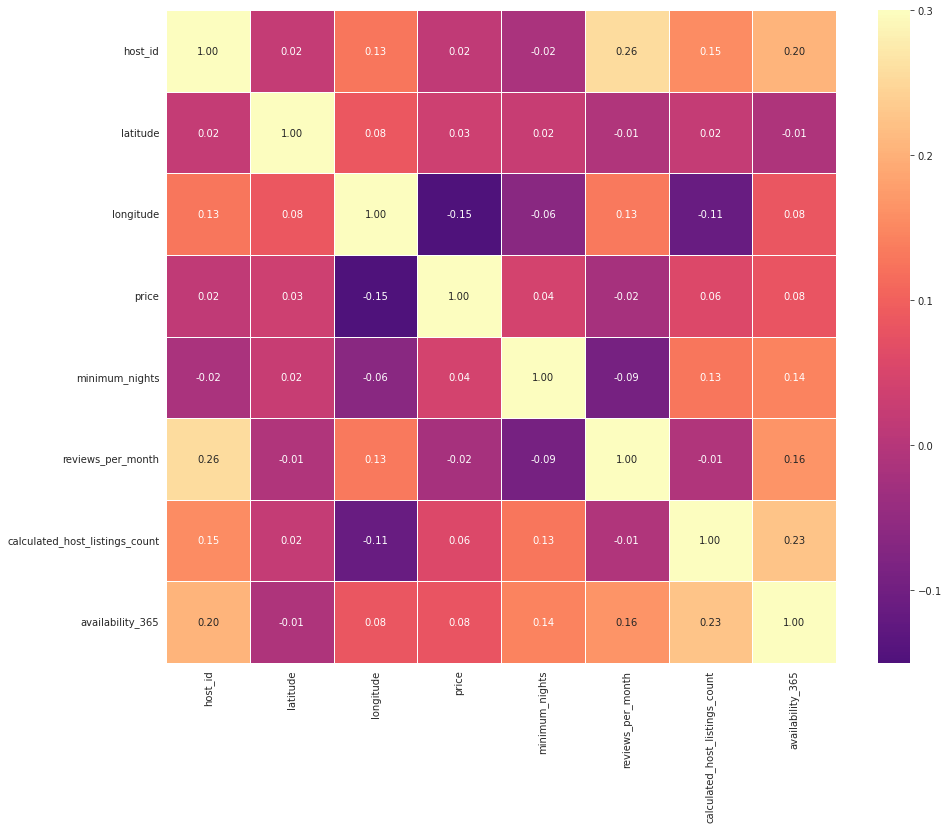

In [9]:
plt.figure(figsize=(15, 12))
palette = sns.diverging_palette(20, 220, n=256)
df_corr = df.corr(method='pearson')
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="magma", vmax=.3, center=0, linewidths=.5)

-  Price doesn't seem to have a strong correlation with any specific factor. Let's delve a little further.

In [10]:
multicol, V = np.linalg.eig(df_corr)
multicol

array([1.55619502, 1.36540247, 0.63576017, 1.04783627, 1.00242637,
       0.88220496, 0.73151995, 0.7786548 ])

- Since no values are 0 in the eigenvector matrix, hence no values are highly related and need not be eliminated from the model

### <a name="EDA-a">a. Frequency of properties by each burrough</a>

Text(0.5, 1.0, 'Which neighbourhoods have the most listed properties?')

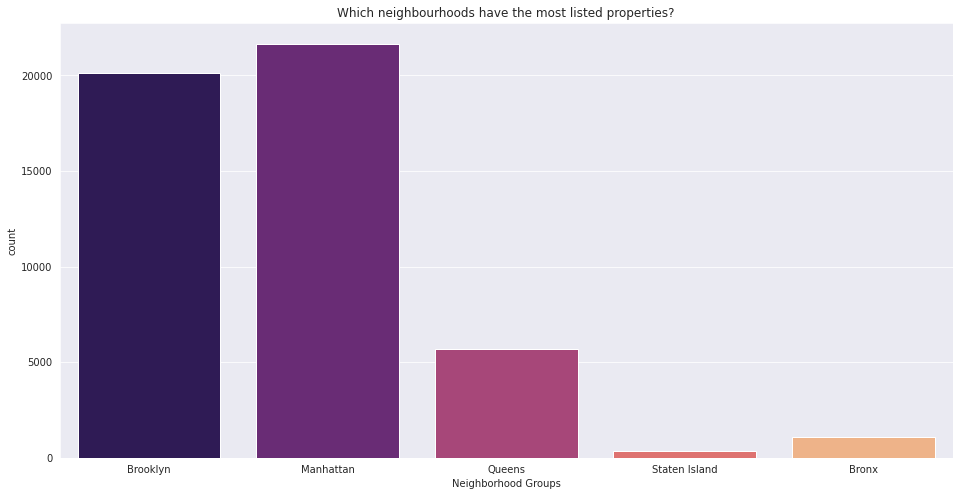

In [11]:
plt.figure(figsize=(16, 8))
sns.countplot(x=df.neighbourhood_group, palette='magma')
plt.xlabel("Neighborhood Groups")
plt.title("Which neighbourhoods have the most listed properties?")

<br>

- Manhattan and Brooklyn make up the vast majority of the properties listed on AirBNB's platform. <br><br> Next, we'll find which neighbourhoods have the most listings in the whole of New York

<br>

Text(0.5, 1.0, 'Map of the AirBNB listings in NYC')

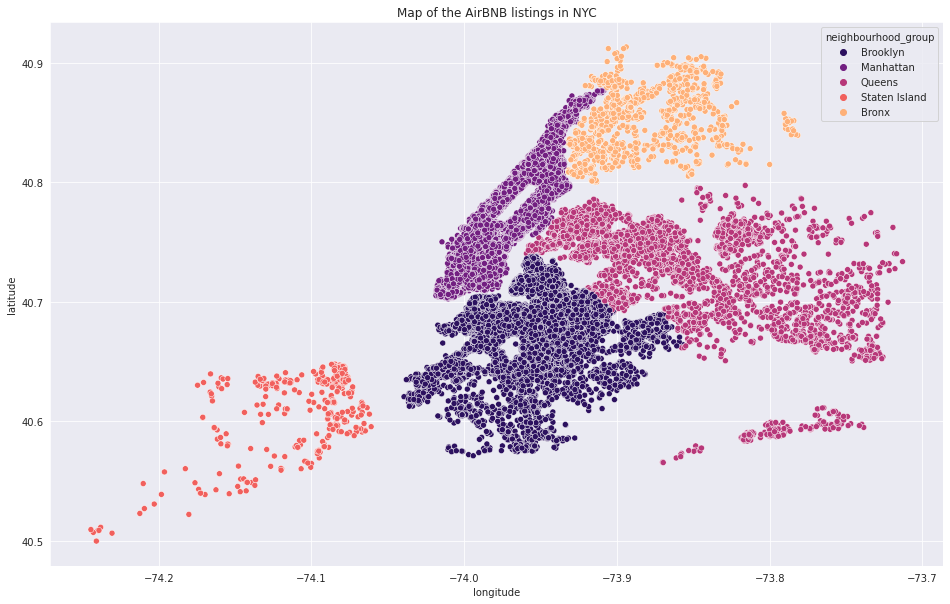

In [12]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='magma')
plt.title("Map of the AirBNB listings in NYC")

Text(0.5, 1.0, 'Room availability in NYC')

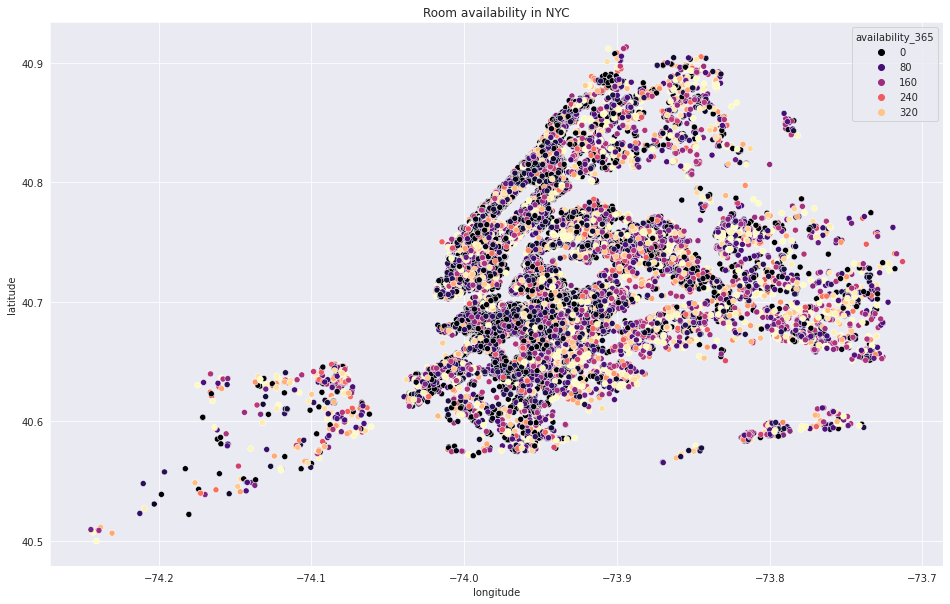

In [13]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365', palette="magma")
plt.title("Room availability in NYC")

### <a name="EDA-b">b. Neighbourhood listing frequency in each burrough</a>

In [14]:
top_neighbourhoods = df.neighbourhood.value_counts()[:15]
top_neighbourhoods

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

<AxesSubplot:>

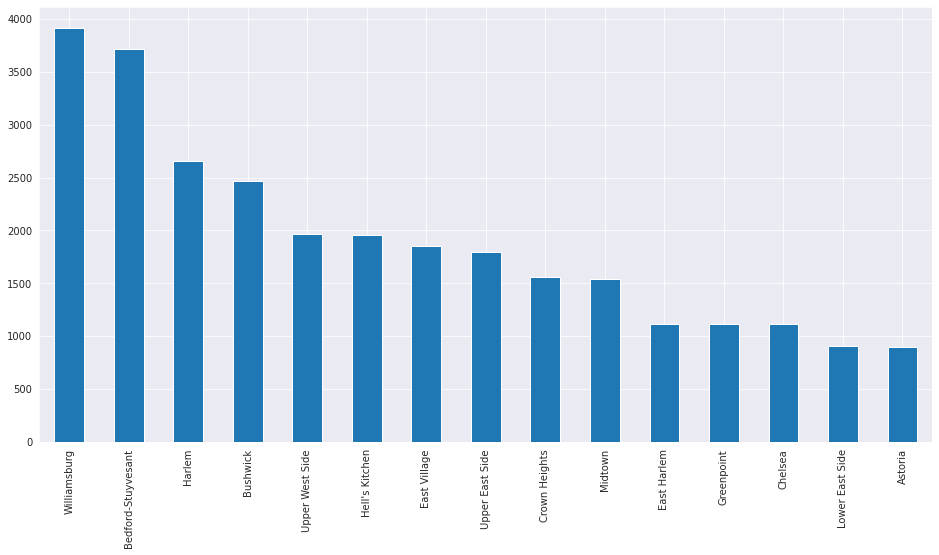

In [15]:
plt.figure(figsize=(16, 8))
top_neighbourhoods.plot(kind="bar")

#### Williamsburg, Bedford-Stuyvesnat, Harlem, Bushwick, Upper West-Side, Hell's Kitchen , East Village, and Upper East Side have the most listings of all the neighbourhoods in New York

In [16]:
# function to determine the top 5 property listing frequencies in 
# each neighbourhood in the given burrough

def burrough_property_distribution(burrough):
    df_b = df[df.neighbourhood_group == burrough]
    a = df_b.neighbourhood.value_counts()[:7]
    plt.figure(figsize=(16, 8))
    plt.title("Counts of properties available")
    a.plot(kind="bar")

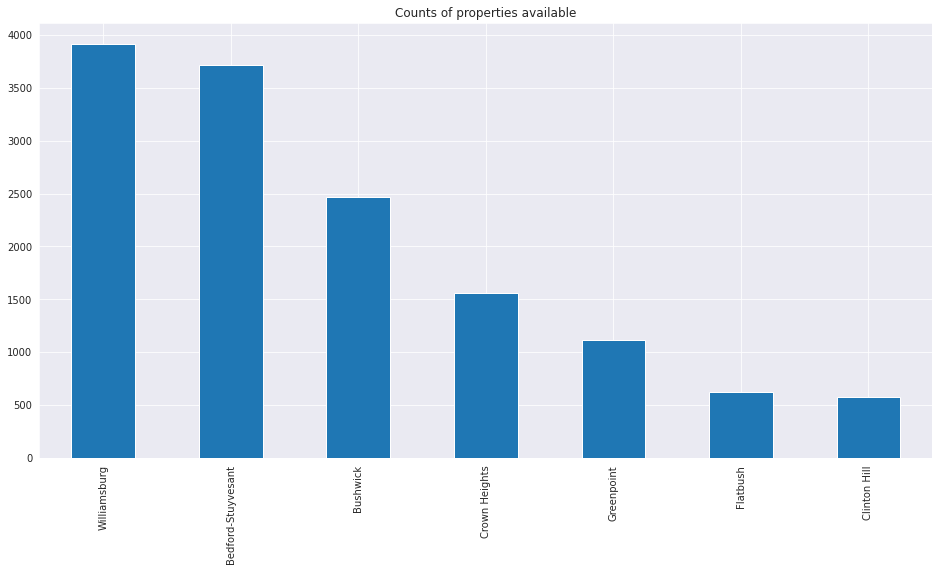

In [17]:
burrough_property_distribution("Brooklyn")

#### In Brooklyn, Williamsburg, Bedford-Stuyvesant and Bushwick has the most listings

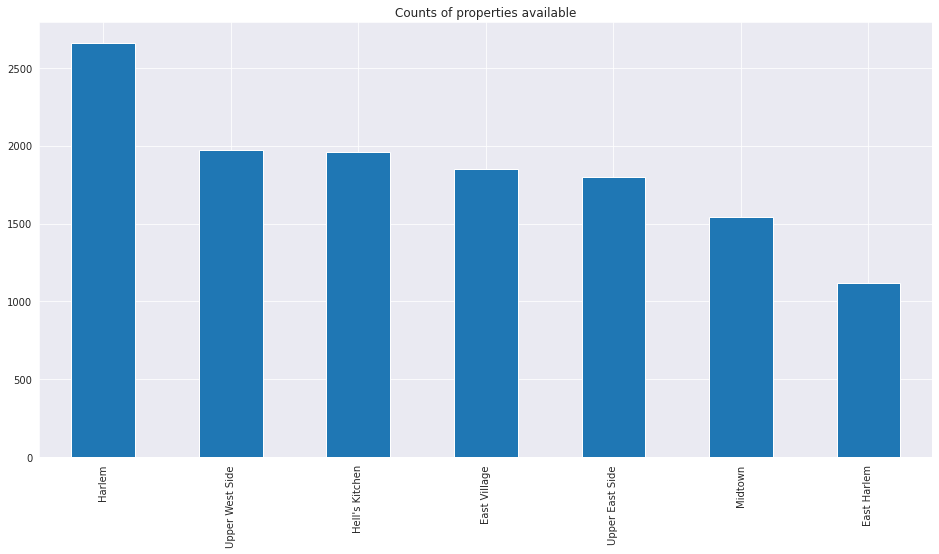

In [18]:
burrough_property_distribution("Manhattan")

#### Harlem, upper West-Side and Hell's Kitchen have the most listings in Manhattan

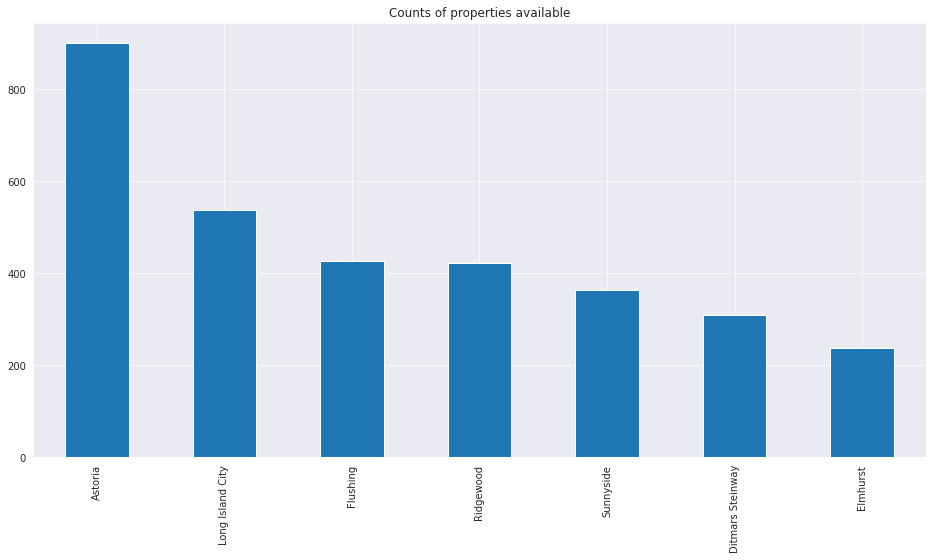

In [19]:
burrough_property_distribution("Queens")

#### Astoria and Long Island City have the most listings in Queens

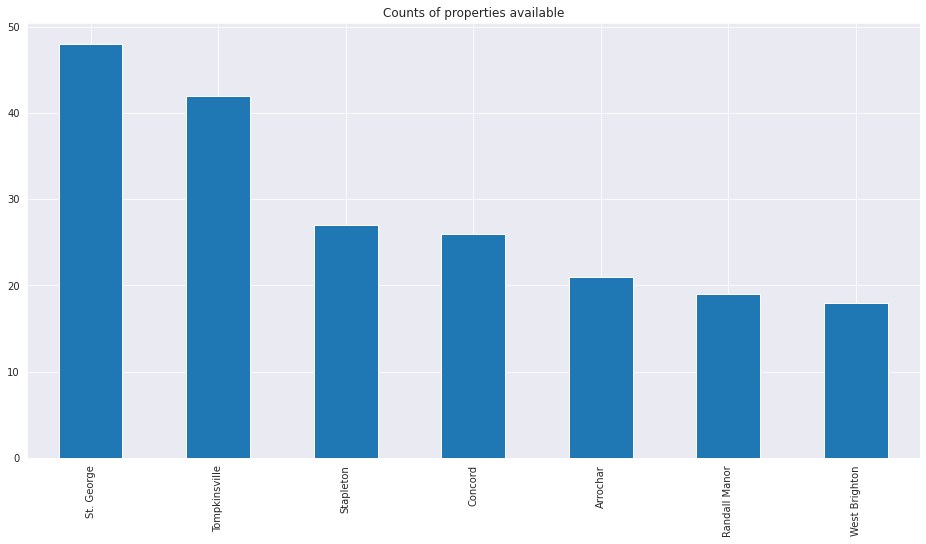

In [20]:
burrough_property_distribution("Staten Island")

#### St. George and Tompkinsville have the most listings in Staten Island

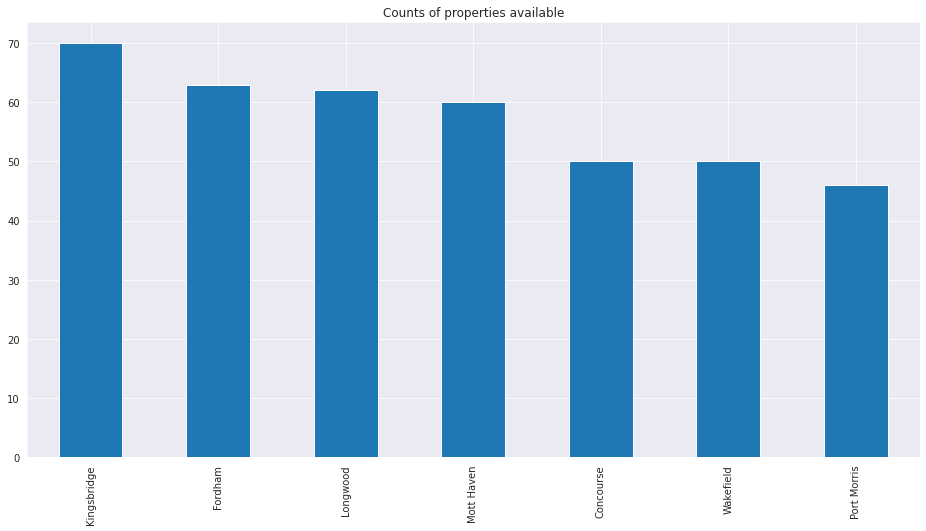

In [21]:
burrough_property_distribution("Bronx")

#### Kingsbridge, Fordham, Longwood and Mott Haven have the most listings in Bronx

### <a name="EDA=c">c. Pricing analysis per burrough</a>

In [22]:
un = df.neighbourhood_group.unique()

print("Average price of a listing\n")
for n in un:
    print(n, '=', df[df.neighbourhood_group == n]['price'].mean().round(2))

Average price of a listing

Brooklyn = 124.38
Manhattan = 196.88
Queens = 99.52
Staten Island = 114.81
Bronx = 87.5


#### On average, Brooklyn and Manhattan have the more expensive listings

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

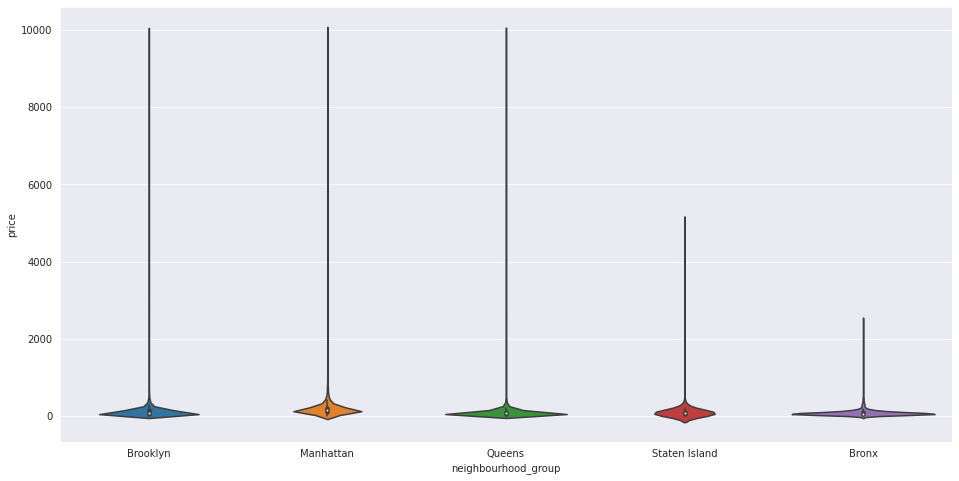

In [23]:
plt.figure(figsize=(16, 8))
sns.violinplot(x="neighbourhood_group", y='price', data=df)

#### As there seem to be extreme outliers in this dataset, we will try to remove some noise from the data

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

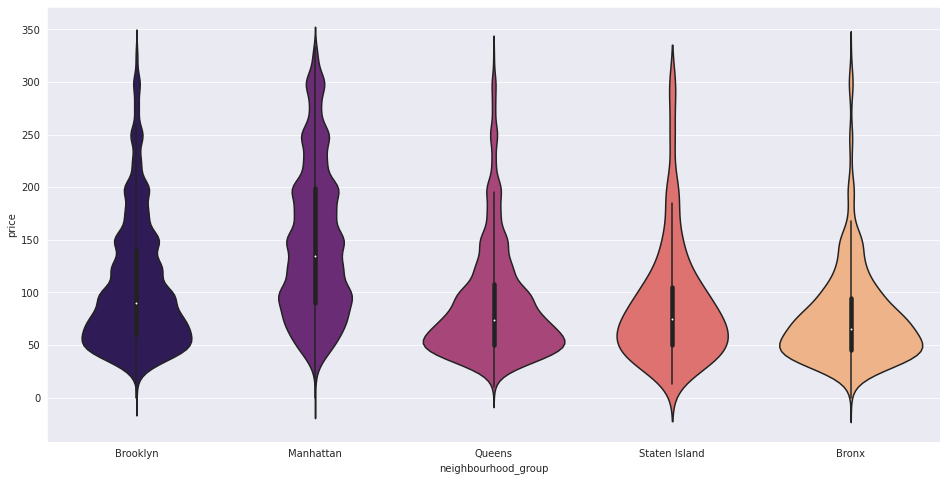

In [24]:
def remove_outliers(data):
    sorted(data)
    Q1,Q3 = np.percentile(data, [25,75])
    inter_quartile_range = Q3 - Q1
    lower_range = Q1 - (1.5 * inter_quartile_range)
    upper_range = Q3 + (1.5 * inter_quartile_range)
    
    return lower_range,upper_range

lower_bound, upper_bound = remove_outliers(df.price)

df_without_price_outliers = df[(df.price > lower_bound) & (df.price < upper_bound)]

plt.figure(figsize=(16, 8))
sns.violinplot(x="neighbourhood_group", y='price', data=df_without_price_outliers, palette='magma')

<AxesSubplot:xlabel='price', ylabel='Count'>

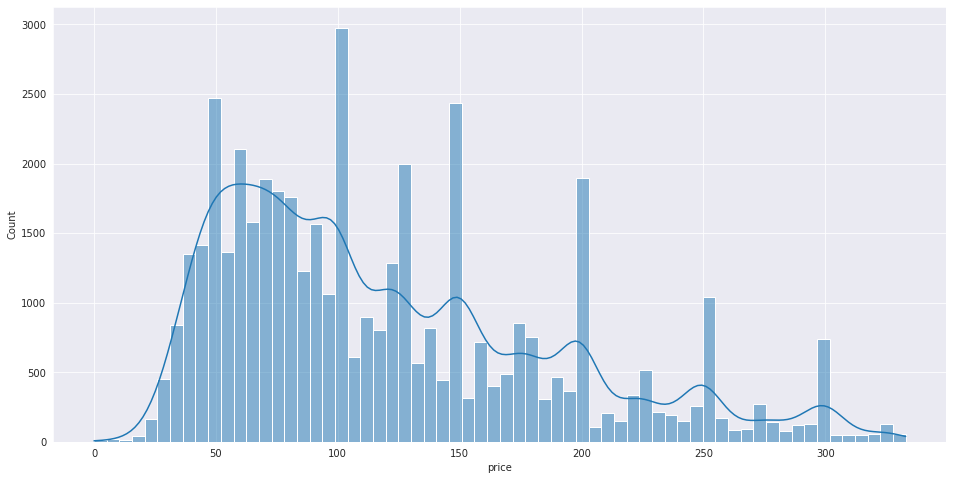

In [25]:
plt.figure(figsize=(16, 8))
sns.histplot(df_without_price_outliers.price, kde=True)

On average, an airBnb costs around 50-120 per night in NYC. There are some extreme outliers, but the price revolves around this range on average

<br>

Text(0.5, 1.0, 'Price of different accomodations in NYC')

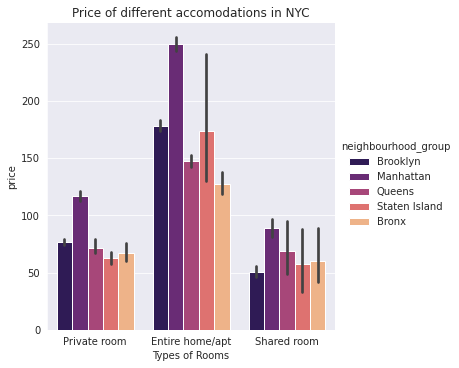

In [26]:
sns.catplot(x="room_type", y='price', hue="neighbourhood_group", data=df, palette='magma', kind="bar")
plt.xlabel("Types of Rooms")
plt.title("Price of different accomodations in NYC")

- Entire home/apt usually cost more (for obvious reasons)
- There is a lot of price variability for entire apt in Staten Island
- The margin of price difference between a private and a shared room is so little that it's a better bet to get a private room

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

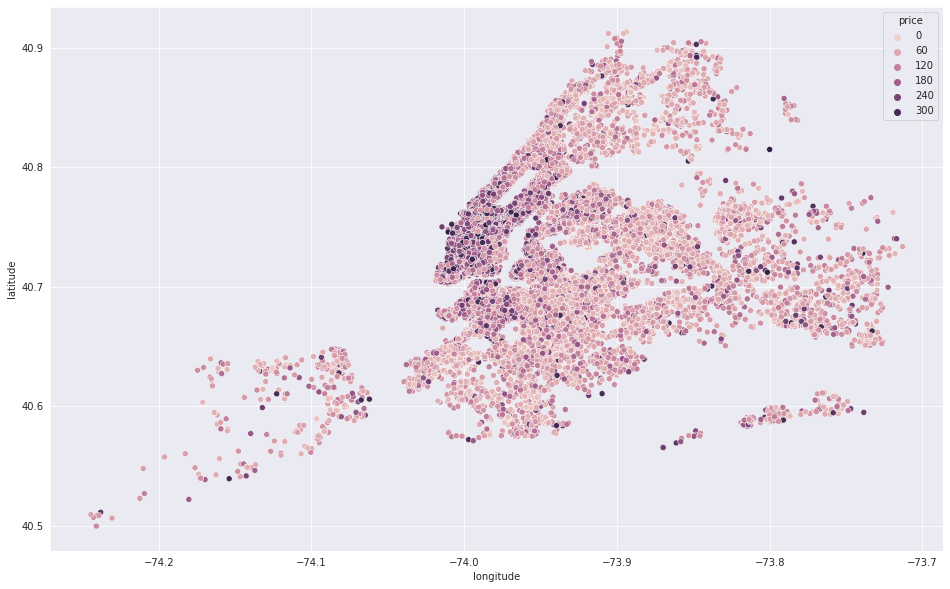

In [27]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_without_price_outliers, x='longitude', y='latitude', hue='price')

### <a name="EDA-d">d. Type of rooms distribution per burrough</a>

Text(0.5, 1.0, 'Types of rooms available in different burroughs of NYC')

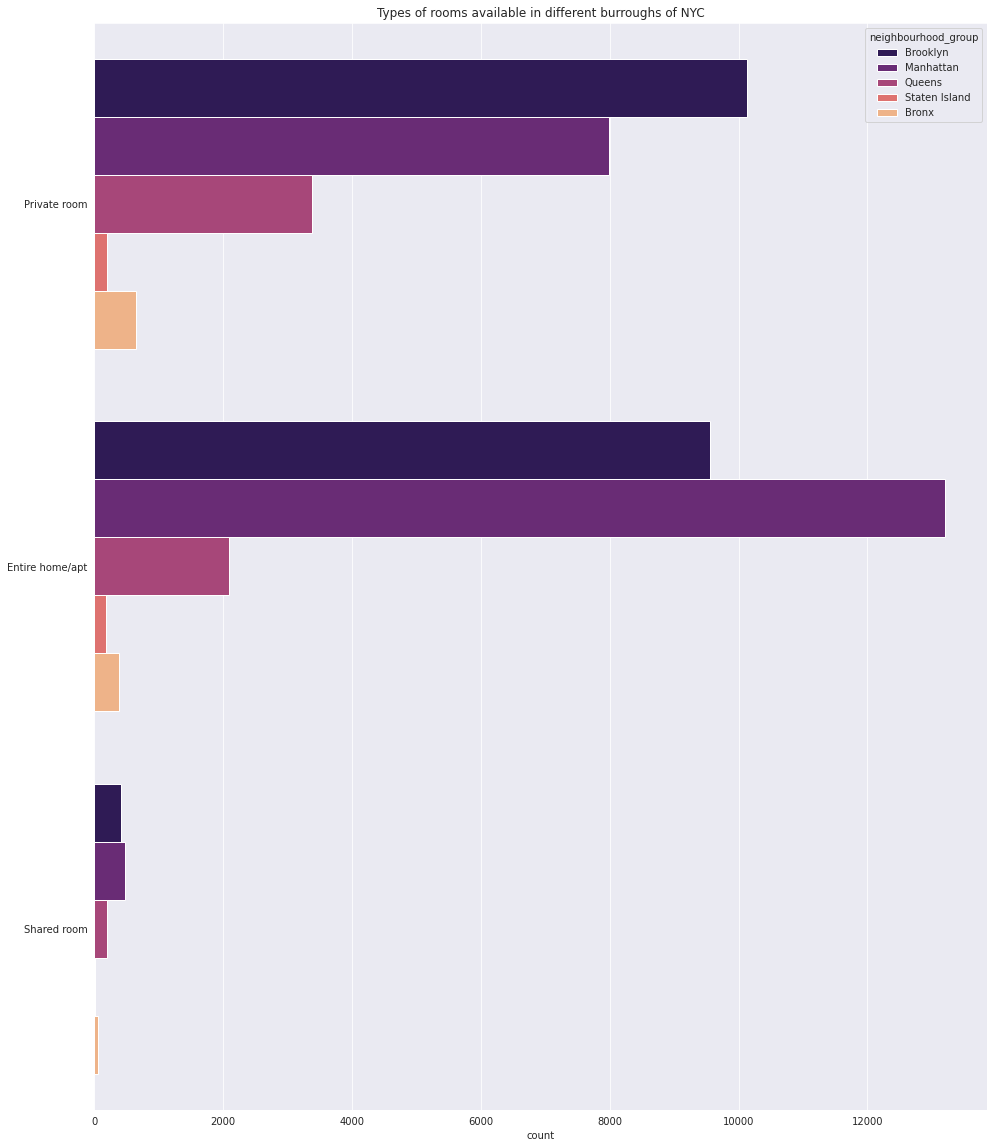

In [28]:
plt.figure(figsize=(16, 20))
sns.countplot(y="room_type", hue="neighbourhood_group", data=df, palette='magma')
plt.ylabel("")
plt.title("Types of rooms available in different burroughs of NYC")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

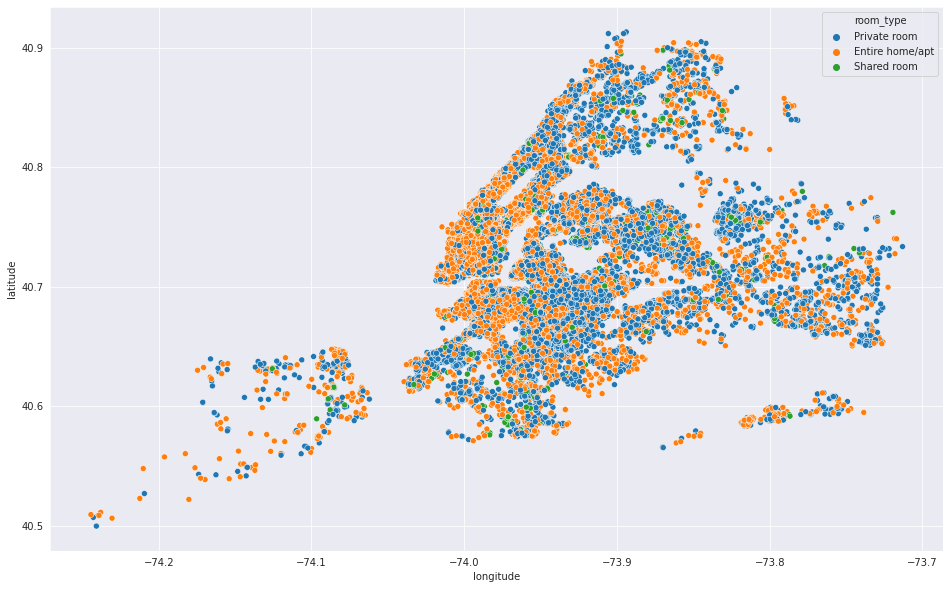

In [29]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_without_price_outliers, x='longitude', y='latitude', hue='room_type')

### <a name="EDA-e">e. Minimum day stay analysis</a>

Text(0, 0.5, '')

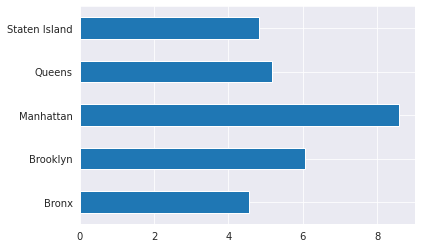

In [30]:
df.groupby('neighbourhood_group')['minimum_nights'].mean().plot(kind='barh')
plt.ylabel("")

Text(0, 0.5, '')

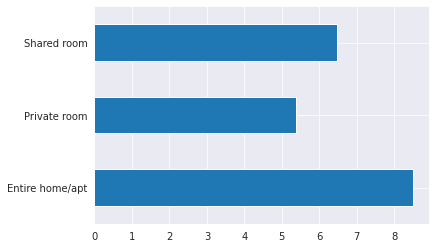

In [31]:
df.groupby('room_type')['minimum_nights'].mean().plot(kind='barh')
plt.ylabel("")

### <a name="EDA-f">f. Hosts analysis</a>

In [32]:
host_with_most_listings = df.groupby(['host_id','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df = host_with_most_listings.nlargest(20,'calculated_host_listings_count')
largest_listings_df

,host_id,neighbourhood_group,calculated_host_listings_count
34757,219517861,Manhattan,106929
29495,107434423,Manhattan,53360
19636,30283594,Manhattan,14641
12846,12243051,Manhattan,9216
14482,16098958,Manhattan,9216
25743,61391963,Manhattan,8281
31174,137358866,Queens,8137
17149,22541573,Manhattan,7482
33975,200380610,Manhattan,4225
3055,1475015,Manhattan,2704


#### These are the host IDs of the hosts with the most listed properties in NYC

In [33]:
hosts_df = host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count', ascending=False)

,host_id,neighbourhood_group,calculated_host_listings_count
34757,219517861,Manhattan,106929
31174,137358866,Queens,8137
9757,7503643,Brooklyn,2704
954,310670,Bronx,169
29249,104812805,Staten Island,64


#### These are the hosts with the most listed properties in each burrough of NY

<br />

In [34]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0.100000,1,0


In [54]:
df_2 = df.copy()
df_2['Price'] = df.price
df_2.drop(['price', 'neighbourhood_group', 'neighbourhood', 'room_type'], axis=1, inplace=True)
df_2.head()

,host_id,latitude,longitude,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,Price
0,2787,40.64749,-73.97237,1,0.210000,6,365,149
1,2845,40.75362,-73.98377,1,0.380000,2,355,225
2,4632,40.80902,-73.94190,3,1.373221,1,365,150
3,4869,40.68514,-73.95976,1,4.640000,1,194,89
4,7192,40.79851,-73.94399,10,0.100000,1,0,80


In [55]:
feature_response = df_2.columns.tolist()
feature_response

['host_id',
 'latitude',
 'longitude',
 'minimum_nights',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'Price']

<AxesSubplot:>

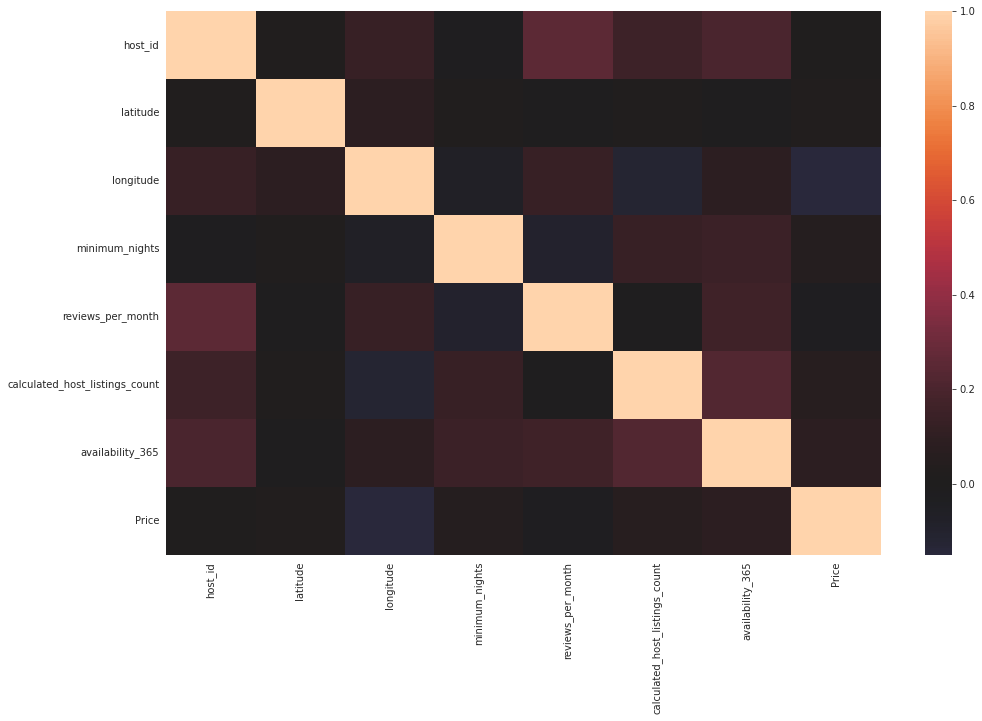

In [56]:
corr = df_2[feature_response].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, center=0)

### univariate analysis for continuous data

In [57]:
X = df_2[feature_response].iloc[:, :-1].values
y = df_2[feature_response].iloc[:, -1].values

In [62]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif

selector = SelectPercentile(f_classif, percentile=20)

selector.fit(X, y)

best_features_idx = selector.get_support()

features = feature_response[:-1]
best_features = [ features[f] for f in range(len(features))
                    if best_features_idx[f]]

best_features

['longitude', 'calculated_host_listings_count']

#### longitude and calculated_host_listings_count have the highest correlation to price